In [25]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [26]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [27]:
NUM_CLASSES = 63

# Dataset reading

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 63)                693       
                                                                 
Total params: 1763 (6.89 KB)
Trainable params: 1763 (6.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [35]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
323/335 [===========================>..] - ETA: 0s - loss: 3.6818 - accuracy: 0.0630
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 3s 6ms/step - loss: 3.6610 - accuracy: 0.0653 - val_loss: 2.7155 - val_accuracy: 0.2673
Epoch 2/1000
 26/335 [=>............................] - ETA: 1s - loss: 2.9184 - accuracy: 0.1493

c:\users\prith\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


327/335 [============================>.] - ETA: 0s - loss: 2.6058 - accuracy: 0.2111
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 2s 5ms/step - loss: 2.6001 - accuracy: 0.2122 - val_loss: 1.8825 - val_accuracy: 0.5470
Epoch 3/1000
333/335 [============================>.] - ETA: 0s - loss: 2.2195 - accuracy: 0.2977
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 2s 5ms/step - loss: 2.2193 - accuracy: 0.2976 - val_loss: 1.5456 - val_accuracy: 0.6839
Epoch 4/1000
325/335 [============================>.] - ETA: 0s - loss: 2.0409 - accuracy: 0.3454
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 2s 5ms/step - loss: 2.0406 - accuracy: 0.3453 - val_loss: 1.3670 - val_accuracy: 0.7383
Epoch 5/1000
331/335 [============================>.] - ETA: 0s - loss: 1.9373 - accuracy: 0.3777


Epoch 1/50
335/335 [==============================] - 2s 5ms/step - loss: 1.1285 - accuracy: 0.6266 - val_loss: 0.4191 - val_accuracy: 0.9188
Epoch 2/50
335/335 [==============================] - 2s 5ms/step - loss: 1.1129 - accuracy: 0.6331 - val_loss: 0.4186 - val_accuracy: 0.9116
Epoch 3/50
335/335 [==============================] - 1s 4ms/step - loss: 1.1095 - accuracy: 0.6356 - val_loss: 0.4164 - val_accuracy: 0.9181
Epoch 4/50
335/335 [==============================] - 1s 4ms/step - loss: 1.1128 - accuracy: 0.6336 - val_loss: 0.4261 - val_accuracy: 0.9033
Epoch 5/50
335/335 [==============================] - 2s 5ms/step - loss: 1.1255 - accuracy: 0.6299 - val_loss: 0.4228 - val_accuracy: 0.9096
Epoch 6/50
335/335 [==============================] - 2s 5ms/step - loss: 1.1129 - accuracy: 0.6331 - val_loss: 0.4125 - val_accuracy: 0.9110
Epoch 7/50
335/335 [==============================] - 2s 5ms/step - loss: 1.1108 - accuracy: 0.6377 - val_loss: 0.4133 - val_accuracy: 0.9181
Epoch 

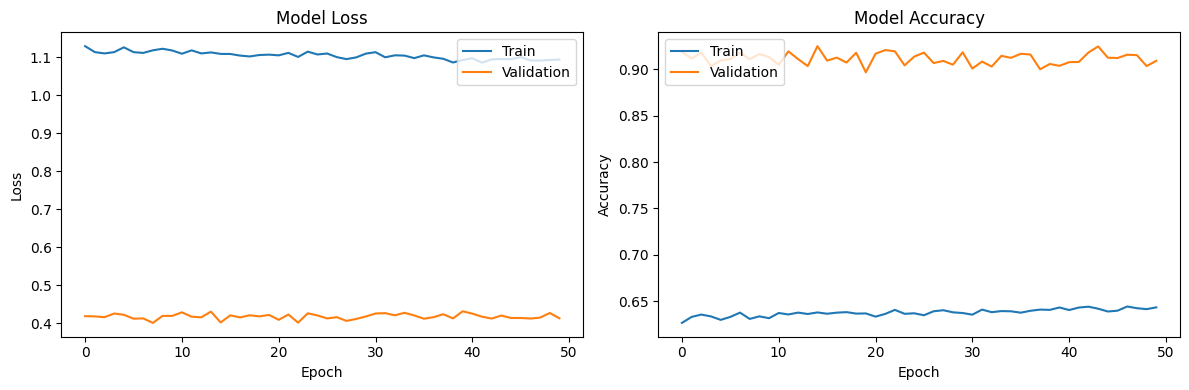

In [39]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=128, 
                    validation_data=(X_test, y_test))

# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

# Confusion matrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))